In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import numpy as np
from pandas import ExcelFile
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

sign = pd.read_csv('motion.csv',index_col='Label')
sign

,LeftForeArm.x,LeftForeArm.y,LeftForeArm.z,LeftHand.x,LeftHand.y,LeftHand.z,LeftHandThumb1.x,LeftHandThumb1.y,LeftHandThumb1.z,LeftHandThumb2.x,...,LeftHandPinky1.x,LeftHandPinky1.y,LeftHandPinky1.z,LeftHandPinky2.x,LeftHandPinky2.y,LeftHandPinky2.z,LeftHandPinky3.x,LeftHandPinky3.y,LeftHandPinky3.z,result
Label,,,,,,,,,,,,,,,,,,,,,
1,25.75333,119.45030,5.9816,28.56990,114.80060,31.40692,25.27210,116.97651,32.00843,23.39756,...,29.36891,119.44207,37.45632,28.93927,118.57821,40.03900,28.26040,117.04254,40.50315,1
1,25.75333,119.45030,5.9816,28.56990,114.80060,31.40692,25.27210,116.97651,32.00843,23.39756,...,29.36891,119.44207,37.45632,28.93940,118.57851,40.03912,28.26057,117.04296,40.50370,1
1,25.75333,119.45030,5.9816,28.57289,114.79506,31.40558,25.27509,116.97097,32.00708,23.40055,...,29.37190,119.43652,37.45498,28.94277,118.57385,40.03813,28.26406,117.03862,40.50395,1
1,25.75333,119.45030,5.9816,28.57506,114.79554,31.40542,25.27726,116.97144,32.00693,23.40323,...,29.37407,119.43700,37.45482,28.94525,118.57505,40.03827,28.26663,117.04010,40.50513,1
1,25.75333,119.45030,5.9816,28.57935,114.79887,31.40556,25.28187,116.97508,32.00778,23.40868,...,29.37963,119.43937,37.45553,28.95111,118.57730,40.03899,28.27240,117.04242,40.50598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,26.40520,119.45031,1.3338,20.92295,139.69777,16.69561,18.78952,142.44000,14.72064,16.05640,...,20.47807,146.24977,20.65165,18.25974,145.57777,22.14446,17.81425,144.07867,21.37712,5
5,26.40520,119.45031,1.3338,20.89835,139.65367,16.74479,18.75999,142.39632,14.77573,16.02475,...,20.44780,146.19872,20.71168,18.23157,145.52268,22.20577,17.78605,144.02407,21.43749,5
5,26.40520,119.45031,1.3338,20.87256,139.61288,16.78892,18.72699,142.35236,14.82331,15.98773,...,20.41297,146.15497,20.75964,18.19998,145.47754,22.25792,17.75230,143.97793,21.49287,5


In [2]:
x = sign[['LeftForeArm.x', 'LeftForeArm.y', 'LeftForeArm.z', 'LeftHand.x',
       'LeftHand.y', 'LeftHand.z', 'LeftHandThumb1.x', 'LeftHandThumb1.y',
       'LeftHandThumb1.z', 'LeftHandThumb2.x', 'LeftHandThumb2.y',
       'LeftHandThumb2.z', 'LeftHandThumb3.x', 'LeftHandThumb3.y',
       'LeftHandThumb3.z', 'LeftInHandIndex.x', 'LeftInHandIndex.y',
       'LeftInHandIndex.z', 'LeftHandIndex1.x', 'LeftHandIndex1.y',
       'LeftHandIndex1.z', 'LeftHandIndex2.x', 'LeftHandIndex2.y',
       'LeftHandIndex2.z', 'LeftHandIndex3.x', 'LeftHandIndex3.y',
       'LeftHandIndex3.z', 'LeftInHandMiddle.x', 'LeftInHandMiddle.y',
       'LeftInHandMiddle.z', 'LeftHandMiddle1.x', 'LeftHandMiddle1.y',
       'LeftHandMiddle1.z', 'LeftHandMiddle2.x', 'LeftHandMiddle2.y',
       'LeftHandMiddle2.z', 'LeftHandMiddle3.x', 'LeftHandMiddle3.y',
       'LeftHandMiddle3.z', 'LeftInHandRing.x', 'LeftInHandRing.y',
       'LeftInHandRing.z', 'LeftHandRing1.x', 'LeftHandRing1.y',
       'LeftHandRing1.z', 'LeftHandRing2.x', 'LeftHandRing2.y',
       'LeftHandRing2.z', 'LeftHandRing3.x', 'LeftHandRing3.y',
       'LeftHandRing3.z', 'LeftInHandPinky.x', 'LeftInHandPinky.y',
       'LeftInHandPinky.z', 'LeftHandPinky1.x', 'LeftHandPinky1.y',
       'LeftHandPinky1.z', 'LeftHandPinky2.x', 'LeftHandPinky2.y',
       'LeftHandPinky2.z', 'LeftHandPinky3.x', 'LeftHandPinky3.y',
       'LeftHandPinky3.z']]
y = sign[['result']]


In [3]:
x = scaler.fit_transform(x[:])
print(x)

[[0.         0.         1.         ... 0.69241361 0.07595065 0.98700503]
 [0.         0.         1.         ... 0.6924173  0.07596076 0.98701971]
 [0.         0.         1.         ... 0.69249316 0.07585628 0.98702638]
 ...
 [0.97484634 1.         0.32883658 ... 0.46401856 0.72440821 0.47975068]
 [0.97484634 1.         0.32883658 ... 0.46331782 0.72334724 0.48113234]
 [0.97484634 1.         0.32883658 ... 0.46248406 0.72243072 0.48239178]]


In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y)
y_onehot = enc.transform(y).toarray()

In [5]:
y

,result
Label,
1,1
1,1
1,1
1,1
1,1
...,...
5,5
5,5
5,5


In [6]:
y_onehot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [7]:
x_train_all,x_test,y_train_all,y_test = train_test_split(x,y_onehot, stratify=y_onehot,test_size=0.2, random_state=42)

In [8]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2, random_state=42)

In [9]:
print(x.shape)
print(x_train_all.shape)
print(x_train.shape)
print(x_val.shape)
print(y_onehot.shape)
print(y_train_all.shape)
print(y_train.shape)
print(y_val.shape)

(31866, 63)
(25492, 63)
(20393, 63)
(5099, 63)
(31866, 5)
(25492, 5)
(20393, 5)
(5099, 5)


In [10]:
y_train_all

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [11]:
model = Sequential()
model.add(Dense(100, input_shape =(63,)))
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               6400      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 6,905
Trainable params: 6,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train, epochs=30, validation_data = (x_val, y_val))

Epoch 1/30
638/638 [==============================] - 0s 648us/step - loss: 1.5881 - accuracy: 0.2821 - val_loss: 1.5595 - val_accuracy: 0.3828
Epoch 2/30
638/638 [==============================] - 0s 520us/step - loss: 1.5328 - accuracy: 0.3874 - val_loss: 1.5052 - val_accuracy: 0.3675
Epoch 3/30
638/638 [==============================] - 0s 529us/step - loss: 1.4810 - accuracy: 0.4089 - val_loss: 1.4563 - val_accuracy: 0.4134
Epoch 4/30
638/638 [==============================] - 0s 516us/step - loss: 1.4288 - accuracy: 0.4220 - val_loss: 1.4001 - val_accuracy: 0.4197
Epoch 5/30
638/638 [==============================] - 0s 521us/step - loss: 1.3762 - accuracy: 0.4354 - val_loss: 1.3461 - val_accuracy: 0.4385
Epoch 6/30
638/638 [==============================] - 0s 515us/step - loss: 1.3238 - accuracy: 0.4466 - val_loss: 1.2933 - val_accuracy: 0.4544
Epoch 7/30
638/638 [==============================] - 0s 504us/step - loss: 1.2731 - accuracy: 0.4627 - val_loss: 1.2456 - val_accuracy:

In [13]:
# 모델 구조

model = Sequential()
model.add(Dense(100, input_shape =(63,)))
model.add(Activation('sigmoid'))
model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               6400      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                2525      
_________________________________________________________________
activation_3 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
activation_4 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [14]:
#데이터로 모델 학습하기
history = model.fit(x_train,y_train,epochs=50, validation_data = (x_val, y_val))


Epoch 1/50
638/638 [==============================] - 0s 684us/step - loss: 1.6073 - accuracy: 0.2084 - val_loss: 1.6040 - val_accuracy: 0.2144
Epoch 2/50
638/638 [==============================] - 0s 568us/step - loss: 1.6024 - accuracy: 0.2134 - val_loss: 1.6011 - val_accuracy: 0.2059
Epoch 3/50
638/638 [==============================] - 0s 568us/step - loss: 1.5987 - accuracy: 0.2138 - val_loss: 1.5960 - val_accuracy: 0.2120
Epoch 4/50
638/638 [==============================] - 0s 554us/step - loss: 1.5938 - accuracy: 0.2303 - val_loss: 1.5910 - val_accuracy: 0.2920
Epoch 5/50
638/638 [==============================] - 0s 577us/step - loss: 1.5877 - accuracy: 0.2716 - val_loss: 1.5844 - val_accuracy: 0.2797
Epoch 6/50
638/638 [==============================] - 0s 563us/step - loss: 1.5792 - accuracy: 0.2805 - val_loss: 1.5736 - val_accuracy: 0.2969
Epoch 7/50
638/638 [==============================] - 0s 569us/step - loss: 1.5663 - accuracy: 0.2834 - val_loss: 1.5572 - val_accuracy:

Text(0, 0.5, 'loss')

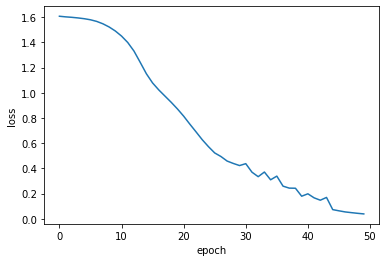

In [25]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

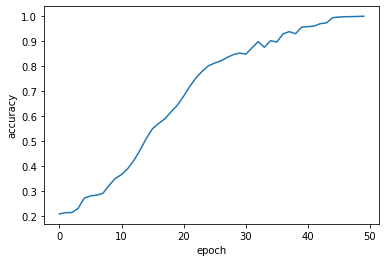

In [26]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [17]:
pred = model.predict(x_test)
print(pred)

[[1.01082306e-02 2.59124135e-07 4.54088226e-02 9.42669749e-01
  1.81293336e-03]
 [6.21644576e-12 9.55786586e-01 4.42131646e-02 2.11280479e-07
  1.58065334e-16]
 [9.96263921e-01 3.53083990e-13 2.46018362e-06 2.03758501e-03
  1.69593794e-03]
 ...
 [1.73149911e-05 1.72255630e-25 5.24065437e-13 1.01981146e-04
  9.99880672e-01]
 [4.44416516e-03 1.64758707e-10 1.14127109e-03 9.54745293e-01
  3.96692194e-02]
 [7.14678841e-04 1.76102743e-10 7.94636377e-04 9.35925364e-01
  6.25653490e-02]]


In [18]:
pred_label = np.argmax(pred, axis=1)
print(pred_label)

[3 1 0 ... 4 3 3]


In [19]:
pred_label[0:9]

array([3, 1, 0, 2, 4, 1, 0, 3, 0])

In [20]:
y_test[0:9]

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])